# How to plot markers on top of each other in legend without HandlerTuple

In [1]:
import matplotlib.path as mpath
import numpy as np
import matplotlib.markers as mmarkers
import matplotlib.pyplot as plt
from matplotlib.legend_handler import (HandlerPathCollection, HandlerRegularPolyCollection,
                                       HandlerNpointsYoffsets, HandlerTuple)
from matplotlib.legend import Legend
from matplotlib.collections import PathCollection
from matplotlib.colors import to_rgba

In [2]:
hexcolor = 'yellow'
pentcolor = 'blue'
linewidths = 0.5
s = 1000

# Create football markers

The points are hard coded, but were created from this: https://github.com/andrewRowlinson/data-science/blob/master/data_visualization/matplotlib_football_marker.ipynb. The football needs to be plotted as two seperate paths, as each path needs to be filled in a different color.

In [3]:
# football hexagon arrays
football_hexagon_codes = np.array([1, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 79, 1, 3,
                                   3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 79, 1, 3, 3, 3,
                                   3, 4, 4, 4, 3, 3, 2, 3, 3, 79, 1, 2, 3, 3, 4, 4, 4,
                                   3, 3, 3, 3, 3, 3, 79, 1, 3, 3, 3, 3, 4, 4, 4, 3, 3,
                                   3, 3, 3, 3, 79, 1, 1, 1, 1])
football_hexagon_vertices = np.array([[-0.22499999999999998, -0.3096859321060139],
                                      [-0.3578624191511828, -0.42126390612162967],
                                      [-0.4307248383023656, -0.5928418801372455],
                                      [-0.29662436542138726, -0.7538845585184165],
                                      [-0.22252389254040889, -0.9749272368995876],
                                      [-0.07605800448461039, -1.0083575877001376],
                                      [0.07605800448461039, -1.0083575877001376],
                                      [0.22252389254040889, -0.9749272368995876],
                                      [0.29662436542138726, -0.7538845585184165],
                                      [0.43072483830236563, -0.5928418801372455],
                                      [0.3578624191511828, -0.4212639061216298],
                                      [0.22499999999999987, -0.30968593210601403],
                                      [-0.00000000000000005551115123125783, -0.33968593210601394],
                                      [-0.22499999999999998, -0.3096859321060139],
                                      [-0.22499999999999998, -0.3096859321060139],
                                      [0.22499999999999984, -0.309685932106014],
                                      [0.35786241915118266, -0.42126390612162967],
                                      [0.4307248383023654, -0.5928418801372455],
                                      [0.6745860377099481, -0.5228718813250733],
                                      [0.8584472371175307, -0.5129018825129013],
                                      [0.9355018385938869, -0.38393509178776364],
                                      [0.982508270481868, -0.2392641702247741],
                                      [0.9959745660164324, -0.0896362864490644],
                                      [0.8164509970942311, 0.038404580904486146],
                                      [0.6969274281720299, 0.2264454482580367],
                                      [0.5004925378203781, 0.1423674742424208],
                                      [0.36405764746872626, 0.11828950022680491],
                                      [0.3245288237343631, -0.06569821593960454],
                                      [0.22499999999999984, -0.309685932106014],
                                      [0.22499999999999984, -0.309685932106014],
                                      [0.36405764746872626, 0.11828950022680493],
                                      [0.5004925378203782, 0.14236747424242066],
                                      [0.69692742817203, 0.22644544825803642],
                                      [0.6950004453997567, 0.47219094443542353],
                                      [0.7530734626274834, 0.6579364406128105],
                                      [0.654229937273651, 0.77107265150149],
                                      [0.531165500901059, 0.8604841982111864],
                                      [0.3930222411881726, 0.919528965248744],
                                      [0.22651112059408626, 0.7961609145035808],
                                      [-0.00000000000000005551115123125783, 0.7327928637584178],
                                      [0.00000000000000013877787807814457, 0.3827928637584179],
                                      [0.2120288237343632, 0.28054118199261147],
                                      [0.36405764746872626, 0.11828950022680493],
                                      [0.36405764746872626, 0.11828950022680493],
                                      [0.00000000000000013877787807814457, 0.38279286375841787],
                                      [0.00000000000000016653345369377348, 0.7327928637584178],
                                      [-0.226511120594086, 0.796160914503581],
                                      [-0.3930222411881722, 0.9195289652487442],
                                      [-0.5311655009010592, 0.8604841982111865],
                                      [-0.6542299372736504, 0.771072651501486],
                                      [-0.7530734626274826, 0.6579364406128061],
                                      [-0.6950004453997563, 0.41219094443542137],
                                      [-0.69692742817203, 0.22644544825803659],
                                      [-0.5604925378203782, 0.14236747424242088],
                                      [-0.36405764746872626, 0.1182895002268052],
                                      [-0.21202882373436308, 0.28054118199261147],
                                      [0.00000000000000013877787807814457, 0.38279286375841787],
                                      [0.00000000000000013877787807814457, 0.38279286375841787],
                                      [-0.36405764746872615, 0.11828950022680515],
                                      [-0.560492537820378, 0.142367474242421],
                                      [-0.6969274281720299, 0.2264454482580368],
                                      [-0.8164509970942311, 0.03840458090448631],
                                      [-0.9959745660164324, -0.08963628644906418],
                                      [-0.9825082704818681, -0.23926417022477386],
                                      [-0.9355018385938869, -0.38393509178776364],
                                      [-0.8584472371175307, -0.5129018825129013],
                                      [-0.6145860377099481, -0.5228718813250733],
                                      [-0.43072483830236563, -0.5928418801372455],
                                      [-0.3578624191511829, -0.42126390612162967],
                                      [-0.2250000000000001, -0.30968593210601386],
                                      [-0.3245288237343631, -0.12569821593960442],
                                      [-0.36405764746872615, 0.11828950022680515],
                                      [-0.36405764746872615, 0.11828950022680515],
                                      [-1.0204451903760434, -1.0083575877001376],
                                      [-1.0204451903760434, 1.0268236782504188],
                                      [1.0204451903760436, -1.0083575877001376],
                                      [1.0204451903760436, 1.0268236782504188]])

# football pentagon arrays
football_pentagon_codes = np.array([1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 79, 1, 3, 3, 4, 4,
                                    4, 3, 3, 79, 1, 3, 3, 4, 4, 4, 3, 3, 79, 1, 3, 3, 4,
                                    4, 4, 3, 3, 79, 1, 3, 3, 4, 4, 4, 3, 3, 79, 1, 3, 3,
                                    4, 4, 4, 3, 3, 79, 1, 1, 1, 1])
football_pentagon_vertices = np.array([[0.000000000000000023439302766909766, 0.38279286375841787],
                                       [-0.21202882373436308, 0.28054118199261147],
                                       [-0.3640576474687262, 0.11828950022680507],
                                       [-0.3245288237343631, -0.12569821593960442],
                                       [-0.22499999999999998, -0.3096859321060139],
                                       [-0.00000000000000005551115123125783, -0.33968593210601394],
                                       [0.22499999999999987, -0.30968593210601403],
                                       [0.3245288237343631, -0.06569821593960454],
                                       [0.36405764746872626, 0.11828950022680493],
                                       [0.2120288237343632, 0.28054118199261147],
                                       [0.00000000000000011719651383454883, 0.38279286375841787],
                                       [0.00000000000000011719651383454883, 0.38279286375841787],
                                       [0.43072483830236563, -0.5928418801372455],
                                       [0.29662436542138726, -0.7538845585184165],
                                       [0.22252389254040889, -0.9749272368995876],
                                       [0.48867813807221294, -0.9141784174079514],
                                       [0.7184254914884021, -0.7472571944544121],
                                       [0.8584472371175307, -0.5129018825129013],
                                       [0.6745860377099481, -0.5228718813250733],
                                       [0.43072483830236563, -0.5928418801372455],
                                       [0.43072483830236563, -0.5928418801372455],
                                       [0.6969274281720299, 0.2264454482580367],
                                       [0.8164509970942311, 0.038404580904486146],
                                       [0.9959745660164324, -0.0896362864490644],
                                       [1.0204451903760436, 0.18226386071471035],
                                       [0.9326895101963948, 0.4523480728972359],
                                       [0.7530734626274834, 0.6579364406128105],
                                       [0.6950004453997567, 0.47219094443542353],
                                       [0.6969274281720299, 0.2264454482580367],
                                       [0.6969274281720299, 0.2264454482580367],
                                       [-0.00000000000000005551115123125783, 0.7327928637584178],
                                       [0.22651112059408626, 0.7961609145035808],
                                       [0.3930222411881726, 0.919528965248744],
                                       [0.1419916732365391, 1.0268236782504185],
                                       [-0.14199167323653866, 1.0268236782504188],
                                       [-0.3930222411881722, 0.9195289652487442],
                                       [-0.226511120594086, 0.796160914503581],
                                       [-0.00000000000000005551115123125783, 0.7327928637584178],
                                       [-0.00000000000000005551115123125783, 0.7327928637584178],
                                       [-0.69692742817203, 0.22644544825803659],
                                       [-0.6950004453997563, 0.41219094443542137],
                                       [-0.7530734626274826, 0.6579364406128061],
                                       [-0.9326895101963917, 0.452348072897233],
                                       [-1.0204451903760434, 0.18226386071470885],
                                       [-0.9959745660164324, -0.08963628644906418],
                                       [-0.8164509970942311, 0.03840458090448631],
                                       [-0.69692742817203, 0.22644544825803659],
                                       [-0.69692742817203, 0.22644544825803659],
                                       [-0.43072483830236563, -0.5928418801372455],
                                       [-0.6145860377099481, -0.5228718813250733],
                                       [-0.8584472371175307, -0.5129018825129013],
                                       [-0.7184254914884021, -0.7472571944544121],
                                       [-0.48867813807221294, -0.9141784174079514],
                                       [-0.22252389254040889, -0.9749272368995876],
                                       [-0.29662436542138726, -0.7538845585184165],
                                       [-0.43072483830236563, -0.5928418801372455],
                                       [-0.43072483830236563, -0.5928418801372455],
                                       [-1.0204451903760434, -1.0083575877001376],
                                       [-1.0204451903760434, 1.0268236782504188],
                                       [1.0204451903760436, -1.0083575877001376],
                                       [1.0204451903760436, 1.0268236782504188]])

football_hexagon_marker = mpath.Path(football_hexagon_vertices, football_hexagon_codes)
football_pentagon_marker = mpath.Path(football_pentagon_vertices, football_pentagon_codes)

# Method 1: This method works using HandlerTuple.

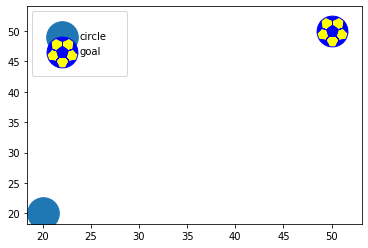

In [4]:
fig, ax = plt.subplots()
sc = ax.scatter(20,20, label='circle',s=1000)
hex_sc = ax.scatter(50,50,edgecolors=pentcolor,facecolors=hexcolor,s=1000, 
                    marker=football_hexagon_marker,zorder=2)
pent_sc = ax.scatter(50,50,edgecolors=pentcolor,facecolors=pentcolor,s=1000,
                     marker=football_pentagon_marker,zorder=2)
handles, labels = ax.get_legend_handles_labels()
labels.append('goal')
handles.append((hex_sc, pent_sc))
ax.legend(handles,labels, borderpad=2)

# Method 2: Create a HandlerFootball class

In [5]:
class HandlerFootball(HandlerPathCollection):   
    
    def create_collection(self, orig_handle, sizes, offsets, transOffset):
        edgecolor = orig_handle.get_edgecolor()[0]
        facecolor = orig_handle.get_facecolor()[0]
        sizes = [size*0.249 for size in sizes]
        p = type(orig_handle)([football_hexagon_marker, football_pentagon_marker],
                              sizes=sizes,
                              offsets=offsets,
                              transOffset=transOffset,
                              facecolors=[facecolor, edgecolor],
                              edgecolors=edgecolor)
        return p
    
    def _default_update_prop(self, legend_handle, orig_handle):
        facecolor = legend_handle.get_facecolor()
        edgecolor = legend_handle.get_edgecolor()
        legend_handle.update_from(orig_handle)
        legend_handle.set_facecolor(facecolor)
        legend_handle.set_edgecolor(edgecolor)

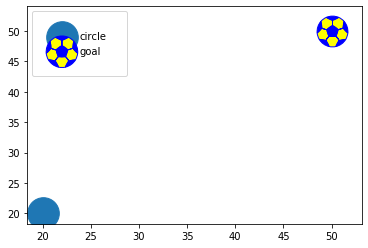

In [6]:
fig, ax = plt.subplots()
sc = ax.scatter(20,20, label='circle',s=1000)
hex_sc = ax.scatter(50,50,edgecolors=pentcolor,facecolors=hexcolor,s=1000, 
                    marker=football_hexagon_marker,zorder=2, label='goal')
Legend.update_default_handler_map({hex_sc: HandlerFootball()})  
pent_sc = ax.scatter(50,50,edgecolors=pentcolor,facecolors=pentcolor,s=1000,
                     marker=football_pentagon_marker,zorder=2)
ax.legend(borderpad=2)